In [58]:
import pandas as pd

In [59]:
video_games = pd.read_csv("vgchartz-2024.csv")

In [60]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [61]:
video_games.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [62]:
video_games = pd.read_csv("vgchartz-2024.csv",parse_dates=["release_date"]).rename({ 
    "title":"Title", 
    "genre":"Genre",
    "publisher":"Publisher",
    "developer":"Developer" ,
    "console":"Console"
    },axis=1)
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           64016 non-null  object        
 1   Title         64016 non-null  object        
 2   Console       64016 non-null  object        
 3   Genre         64016 non-null  object        
 4   Publisher     64016 non-null  object        
 5   Developer     63999 non-null  object        
 6   critic_score  6678 non-null   float64       
 7   total_sales   18922 non-null  float64       
 8   na_sales      12637 non-null  float64       
 9   jp_sales      6726 non-null   float64       
 10  pal_sales     12824 non-null  float64       
 11  other_sales   15128 non-null  float64       
 12  release_date  56965 non-null  datetime64[ns]
 13  last_update   17879 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(7)
memory usage: 6.8+ MB


In [63]:
video_games["release_year"] = video_games['release_date'].dt.year

In [64]:
video_games["release_year"]

0        2013.0
1        2014.0
2        2002.0
3        2013.0
4        2015.0
          ...  
64011    2016.0
64012    2020.0
64013    2020.0
64014    2019.0
64015       NaN
Name: release_year, Length: 64016, dtype: float64

In [65]:
video_games.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000,56965,56965.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041,2006-11-14 06:33:03.491617792,2006.359572
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1971-12-03 00:00:00,1971.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000,2001-03-28 00:00:00,2001.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000,2008-09-16 00:00:00,2008.000000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000,2012-12-27 00:00:00,2012.000000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000,2024-12-31 00:00:00,2024.000000
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643,NaN,8.617813


In [66]:
annual_sales=video_games.groupby("release_year",as_index=False).agg({'total_sales':'sum'})

In [67]:
annual_sales.head()

,release_year,total_sales
0,1971.0,0.00
1,1973.0,0.00
2,1975.0,0.00
3,1977.0,2.50
4,1978.0,2.36


In [68]:
import matplotlib.pyplot as plt

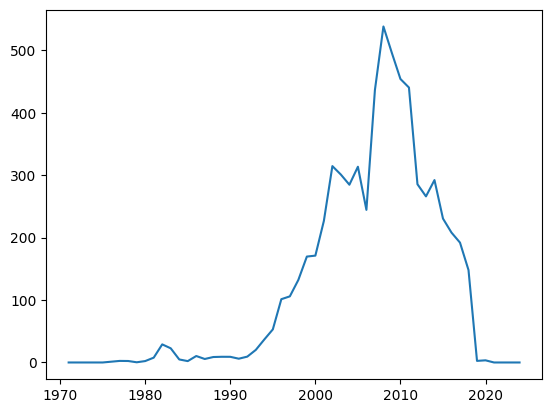

In [69]:
plt.plot(annual_sales["release_year"],annual_sales["total_sales"])

In [70]:
top_title = video_games.groupby("Title",as_index=False).agg({"total_sales":"sum"}).sort_values("total_sales",ascending=False)

In [71]:
top10_title = top_title.head(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Grand Theft Auto V'),
  Text(1, 0, 'Call of Duty: Black Ops'),
  Text(2, 0, 'Call of Duty: Modern Warfare 3'),
  Text(3, 0, 'Call of Duty: Black Ops II'),
  Text(4, 0, 'Call of Duty: Ghosts'),
  Text(5, 0, 'Call of Duty: Black Ops 3'),
  Text(6, 0, 'Call of Duty: Modern Warfare 2'),
  Text(7, 0, 'Minecraft'),
  Text(8, 0, 'Grand Theft Auto IV'),
  Text(9, 0, 'Call of Duty: Advanced Warfare')])

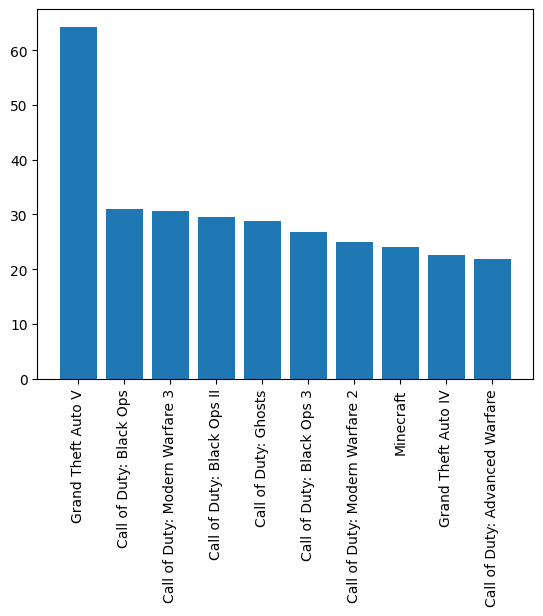

In [72]:
plt.bar(top10_title["Title"],top10_title["total_sales"])
plt.xticks(rotation=90)

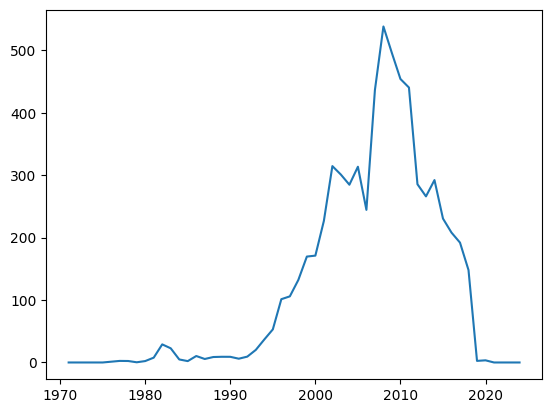

In [73]:
plt.plot(annual_sales["release_year"],annual_sales["total_sales"])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Grand Theft Auto V'),
  Text(1, 0, 'Call of Duty: Black Ops'),
  Text(2, 0, 'Call of Duty: Modern Warfare 3'),
  Text(3, 0, 'Call of Duty: Black Ops II'),
  Text(4, 0, 'Call of Duty: Ghosts'),
  Text(5, 0, 'Call of Duty: Black Ops 3'),
  Text(6, 0, 'Call of Duty: Modern Warfare 2'),
  Text(7, 0, 'Minecraft'),
  Text(8, 0, 'Grand Theft Auto IV'),
  Text(9, 0, 'Call of Duty: Advanced Warfare')])

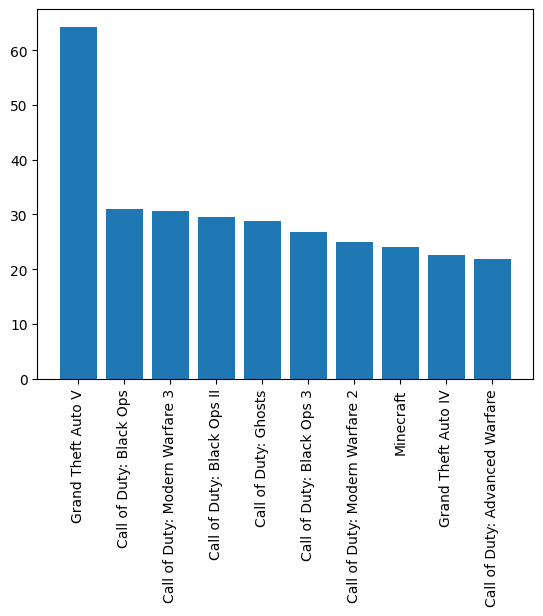

In [74]:
plt.bar(top10_title["Title"],top10_title["total_sales"])
plt.xticks(rotation=90)

In [76]:
from dash import Dash, html, dcc, callback, Output, Input
from dash_bootstrap_templates import load_figure_template
import dash_bootstrap_components as dbc

import plotly.express as px
import pandas as pd
import numpy as np

video_games = pd.read_csv("vgchartz-2024.csv")
video_games = pd.read_csv("vgchartz-2024.csv",parse_dates=["release_date"]).rename({ 
    "title":"Title", 
    "genre":"Genre",
    "publisher":"Publisher",
    "developer":"Developer" ,
    "console":"Console"
    },axis=1)
video_games["release_year"] = video_games['release_date'].dt.year

app = Dash(__name__)

app.layout = dbc.Container([
    html.H1("Video Game Explorer",style={"text-align":"center"}),
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dcc.Markdown("**Select A Category**"),
                dcc.Dropdown(
                    id="category-dropdown",
                    options=["Title","Genre","Publisher","Developer","Console"],value="Title",className="dbc"
                )
            ])
        ]),
        dbc.Col([
            dbc.Card([
                dcc.Markdown("**Select A Region**"),
                dcc.RadioItems(
                    id="region-radio",
                    options={
                        "total_sales":"World Total",
                        "na_sales":"North America",
                        "jp_sales":"Japan",
                        "pal_sales":"Europe/Africa",
                        "other_sales":"Rest of World"
                    },value="total_sales",className="dbc"
                )
            ])
        ]) 
    ]),
    dbc.Row(dcc.Graph(id="sales_line")),
    dbc.Row(dcc.Graph(id="rankings_bar"))
])

@app.callback(
    Output("sales_line","figure"),
    Output("rankings_bar","figure"),
    Input("category-dropdown","value"),
    Input("region-radio","value")
)

def vg_plotter(category,region):
    annual_sales=video_games.groupby("release_year",as_index=False).agg({region:'sum'})
    fig1 = px.line(
        annual_sales,
        x="release_year",
        y=region,
        title=f"Video Game Sales in {region} Over Time"
    ).update_layout(title_x=0.5)

    top10_title = (
        video_games
        .groupby("Title",as_index=False)
        .agg({"total_sales":"sum"})
        .sort_values("total_sales",ascending=False)
        .head(10)
    )

    fig2 = px.bar(
        top10_title,
        x=category,
        y=region,
        title="Top 10 Video Game Sales by Category"
    ).update_layout(title_x=0.5)

    return fig1,fig2
    

if __name__ == '__main__':
    app.run_server()